In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 200
plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['figure.dpi'] = 100

## Import data, extract target, merge test & train

In [2]:
missing_values = ["n/a", "na", "--"]

train = pd.read_csv("data/train.csv", na_values = missing_values)
train_no_target = train.drop('SalePrice', axis=1)
test = pd.read_csv("data/test.csv", na_values = missing_values)

target = train['SalePrice'].copy()

# Set flag to discriminate between test and train
train_no_target['test_data'] = False
test['test_data'] = True

# Concatenate datasets and renumber the index
full_data = pd.concat([train_no_target, test]).reset_index(drop=True)

In [3]:
full_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,test_data
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,False
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,False


## Drop useless columns, bad row

In [4]:
from src.preprocess import clean

drops = ['PoolQC', 'MiscFeature', 'FireplaceQu', 'Id']

elec_na = full_data["Electrical"].isna()
cleaner_data = full_data.drop(elec_na.loc[elec_na == True].index)

# Make sure to drop the same index in the target variable
target = target.drop(elec_na.loc[elec_na == True].index)

cleaner_data = clean(cleaner_data, drop_list=drops)

In [5]:
cleaner_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,test_data
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,False
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,False
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,False
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,False
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,False


## Match null count of sibling columns

In [6]:
from src.preprocess import null_match

siblings = [
    ["BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType1", "BsmtFinType2"],
    ["GarageFinish", "GarageYrBlt", "GarageQual", "GarageCond", "GarageType"],
    ["MasVnrType", "MasVnrArea"]   
]   

sib_match = null_match(cleaner_data, siblings)

## Fill null values

In [7]:
# Create lists of variables names for each data type: integer, float and categorical (objects)
ints = [col for col in sib_match.columns if sib_match.dtypes[col] == "int64"]
floats =  [col for col in sib_match.columns if sib_match.dtypes[col] == "float64"]
cats =  [col for col in sib_match.columns if sib_match.dtypes[col] == "object"]

fill_dict = {0: ints, 0.0: floats, "None": cats}

clean_data = clean(sib_match, fill_na=fill_dict)

# Let's confirm we've removed all nulls:
clean_data.isna().sum().sum()

0

In [8]:
clean_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,test_data
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,0,2,2008,WD,Normal,False
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,0,5,2007,WD,Normal,False
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,0,9,2008,WD,Normal,False
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,0,2,2006,WD,Abnorml,False
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,0,12,2008,WD,Normal,False


## Feature Engineering

In [9]:
from src.preprocess import feat_create
from src.preprocess import ordinal_create

ordinal_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
        'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond'] # May want to add BsmtExposure

new_feats = {
        "Total_Bath": 
            {
                1:['BsmtFullBath','FullBath'], 
                0.5: ['BsmtHalfBath', 'HalfBath']
            },
        "Porch_SF":
            {
                1: ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                    '3SsnPorch', 'ScreenPorch']
            },
        "Total_SF":
            {
                1: ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'] 
            }
}

swap_subclass = {20:'1story 1946+', 
                 30:'1story 1946-', 
                 40:'1story w attic', 
                 45:'1halfstory unfinish', 
                 50:'1halfstory finish', 
                 60:'2story 1946+', 
                 70:'2story 1946-', 
                 75:'2halfstory', 
                 80:'split multi-level', 
                 85:'split foyer', 
                 90:'duplex', 
                 120:'1story PUD 1946+', 
                 150:'1halfstory PUD', 
                 160:'2story PUD 1946+', 
                 180:'PUD multilevel', 
                 190:'2 family conv'}

feat_eng = feat_create(clean_data, new_feats)
feat_eng = ordinal_create(feat_eng, ordinal_vars)
feat_eng['MSSubClass'] = feat_eng['MSSubClass'].map(swap_subclass)

In [10]:
feat_eng.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,test_data,Total_Bath,Porch_SF,Total_SF
0,2story 1946+,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,5,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,3,3,Y,0,61,0,0,0,0,None,0,2,2008,WD,Normal,False,3.5,61.0,2566.0
1,1story 1946+,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,5,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,3,3,Y,298,0,0,0,0,0,None,0,5,2007,WD,Normal,False,2.5,298.0,2524.0
2,2story 1946+,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,5,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,4,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,3,3,Y,0,42,0,0,0,0,None,0,9,2008,WD,Normal,False,3.5,42.0,2706.0
3,2story 1946-,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,4,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,4,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,3,3,Y,0,35,272,0,0,0,None,0,2,2006,WD,Abnorml,False,2.0,307.0,2473.0
4,2story 1946+,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,5,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,4,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,3,3,Y,192,84,0,0,0,0,None,0,12,2008,WD,Normal,False,3.5,276.0,3343.0


In [11]:
# train_only = feat_eng[feat_eng['test_data'] == False]
# train_only.drop(columns='test_data', inplace=True)
# train_only.insert(0, 'SalePrice', target)

# corr = train_only.corr()
# corr_sums = corr[corr > 0.5].sum()

# high_corr = [index for index in corr_sums.index if corr_sums[index] != 1.0]

# corr = train_only[high_corr].corr()
# # corr = corr[corr > 0.5]
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# with sns.axes_style('white'):
#     f, ax = plt.subplots(figsize=(15, 15))
#     ax = sns.heatmap(corr, mask=mask, annot=True, square=True)

## Drop highly correlated 'sibling' variables

In [12]:
drop_list = ['TotRmsAbvGrd', 'GarageArea', 'FullBath', 
             'HalfBath','BsmtHalfBath', 'BsmtFullBath',
             'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
             'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2',
             'LowQualFinSF','WoodDeckSF', 'OpenPorchSF',
             'EnclosedPorch','3SsnPorch', 'ScreenPorch' ]

final_feats = clean(feat_eng, drop_list=drop_list)
final_feats

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,test_data,Total_Bath,Porch_SF,Total_SF
0,2story 1946+,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,Unf,GasA,5,Y,SBrkr,1710,3,1,4,Typ,0,Attchd,2003.0,RFn,2.0,3,3,Y,0,None,0,2,2008,WD,Normal,False,3.5,61.0,2566.0
1,1story 1946+,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,Unf,GasA,5,Y,SBrkr,1262,3,1,3,Typ,1,Attchd,1976.0,RFn,2.0,3,3,Y,0,None,0,5,2007,WD,Normal,False,2.5,298.0,2524.0
2,2story 1946+,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,GLQ,Unf,GasA,5,Y,SBrkr,1786,3,1,4,Typ,1,Attchd,2001.0,RFn,2.0,3,3,Y,0,None,0,9,2008,WD,Normal,False,3.5,42.0,2706.0
3,2story 1946-,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,No,ALQ,Unf,GasA,4,Y,SBrkr,1717,3,1,4,Typ,1,Detchd,1998.0,Unf,3.0,3,3,Y,0,None,0,2,2006,WD,Abnorml,False,2.0,307.0,2473.0
4,2story 1946+,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,GLQ,Unf,GasA,5,Y,SBrkr,2198,4,1,4,Typ,1,Attchd,2000.0,RFn,3.0,3,3,Y,0,None,0,12,2008,WD,Normal,False,3.5,276.0,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2story PUD 1946+,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3,3,No,Unf,Unf,GasA,4,Y,SBrkr,1092,3,1,3,Typ,0,None,0.0,None,0.0,None,None,Y,0,None,0,6,2006,WD,Normal,True,1.5,0.0,1638.0
2915,2story PUD 1946+,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3,3,No,Rec,Unf,GasA,3,Y,SBrkr,1092,3,1,3,Typ,0,CarPort,1970.0,Unf,1.0,3,3,Y,0,None,0,4,2006,WD,Abnorml,True,1.5,24.0,1638.0
2916,1story 1946+,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3,3,No,ALQ,Unf,GasA,5,Y,SBrkr,1224,4,1,3,Typ,1,Detchd,1960.0,Unf,2.0,3,3,Y,0,None,0,9,2006,WD,Abnorml,True,2.0,474.0,2448.0
2917,split foyer,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,3,3,PConc,4,3,Av,GLQ,Unf,GasA,3,Y,SBrkr,970,3,1,3,Typ,0,None,0.0,None,0.0,None,None,Y,0,MnPrv,700,7,2006,WD,Normal,True,1.5,112.0,1882.0


## Scale (standardise) and Transform (normalise) numeric variables

In [66]:
# from src.analyse import analyse
# from src.analyse import test_trans
from src.preprocess import preprocess

scale_feats =  [col for col in final_feats.columns if final_feats.dtypes[col] != "object"]
trans_feats = ['LotArea', 'Total_SF', 'GrLivArea']

final_train = final_feats[final_feats['test_data'] == False]
final_test = final_feats[final_feats['test_data'] == True]

final_train, pipelines = preprocess(final_train, scale_list=scale_feats, transform_list=trans_feats)
final_target, _ = preprocess(pd.DataFrame(target), scale_list=['SalePrice'], transform_list=['SalePrice'])
final_target = final_target['SalePrice']

In [73]:
final_target.describe()

count    1.459000e+03
mean     3.652550e-18
std      1.000343e+00
min     -3.420038e+00
25%     -6.419000e-01
50%     -6.435001e-03
75%      6.751997e-01
max      3.381293e+00
Name: SalePrice, dtype: float64

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X_train, X_valid, y_train, y_valid = train_test_split(final_train, final_target, test_size=0.1, random_state=42)

forest = RandomForestRegressor(n_estimators=100, criterion='mae', random_state=42, max_features=30, min_samples_leaf=2, max_depth=20)
scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores.mean()
forest.fit(X_train, y_train)
result = permutation_importance(forest, X_train, y_train, random_state=42)
# forest.fit(X_train, y_train)
# preds = forest.predict(X_valid)
# print(mean_squared_error(y_valid, preds, squared=False))
# print(mean_absolute_error(y_valid, preds))
# print(forest.score(X_valid, y_valid))
# print(forest.score(X_train, y_train))
# train_preds = forest.predict(X_train)
# print(mean_squared_error(y_train, train_preds))#, squared=False))


<AxesSubplot:xlabel='mean', ylabel='0'>

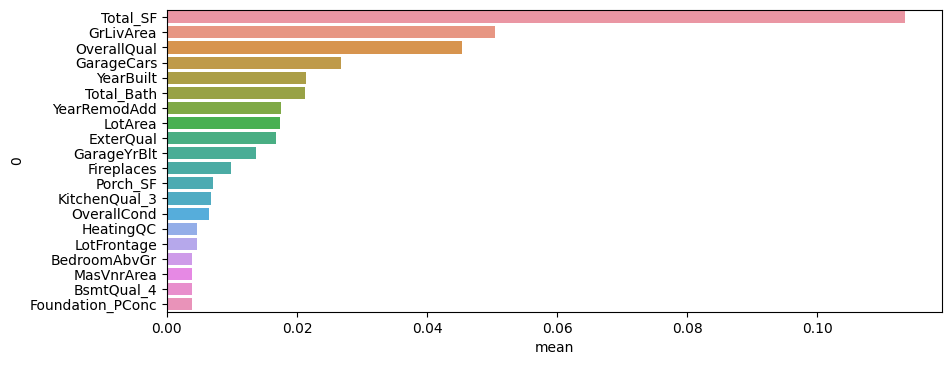

In [107]:
importance = pd.DataFrame(final_train.columns)
importance['mean'] = result['importances_mean']
importance['std'] = result['importances_std']

sort_import =importance.sort_values('mean', ascending=False) 
sort_import = sort_import[:20]
sns.barplot(data=sort_import, x='mean', y=0)
# help(sns.barplot)